In [33]:
# Standards
import math
import numpy as np
import pandas as pd
from numpy.random import randn

# Stats
from scipy import stats

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
#plt.style.use('classic')
import seaborn as sns

# do stats if necessary
from scipy.stats import norm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## All data are populated from elog 7962
## https://elog-gfa.psi.ch/SwissFEL+commissioning/7962
## Measurement date 27.09.2018
## /afs/psi.ch/intranet/SF/data/2018/09/27/

import matplotlib.pyplot as plt
# Command so that plots appear in the Notebook
%matplotlib inline

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# read H5 files
import h5py
from pathlib import Path

In [34]:
# make a class for data

class meas:
    def __init__(self):
        self.x = 0
        self.xerr = 0
        self.xstr = ''
        self.y = 0
        self.yerr = 0
        self.ystr = ''
        self.quad = 0


# instantiate

yag = meas()
lyso = meas()
wsc = meas()

In [35]:
# populate YAG

yag.x = np.array([22, 22.97, 25.54, 28.3, 30.06, 33.42, 43.29, 51.2])
yag.xerr = np.array([0.8, 1.5, 3.2, 1.7, 1.91, 2.77, 4.62, 3.84])
yag.xstr = '$\sigma_x  (\mu m)\ YAG\ screen)$'
yag.quad = np.array([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1])

# populate LYSO

lyso.x = np.array([32.3, 31.3, 30.72, 34.3, 38.14, 40.11, 49.55, 56.91])
lyso.xerr = np.array([0.8, 1.36, 1.14, 1.86, 2.75, 1.56, 2.89, 2.54])
lyso.xstr = '$\sigma_x  (\mu m)\ (LYSO\ screen)$'
lyso.quad = yag.quad

# populate WSC
wsc.x = np.array([10.3, 18.8, 24.1, 21.8, 23.2, 35, 35.2, 55.6])
wsc.xerr = np.array([4.5, 10.6, 12.9, 12.4, 5.2, 8.1, 14, 11])
wsc.xstr = '$\sigma_x  (\mu m)\ (WSC)$'
wsc.quad = yag.quad

# regression range
_top = 60 
_btm = 8
x = np.linspace(_btm, _top, len(yag.x))

In [36]:
def plotdata(data1, data2):
    """Function to plot measurement vs measurement data inc linear regression"""

    plt.figure(figsize=(9, 9), dpi= 80)
    plt.errorbar(data1.x, data2.x, data1.xerr, data2.xerr,
                    fmt=':o', mec='blue', ms=3, mew=2, capthick=2, linewidth=1.4, capsize=3)
    plt.axes().set_aspect('equal')

    plt.ylabel(data1.xstr)
    plt.xlabel(data2.xstr)
    plt.title("Wirescanner and screen nonlinearity measurement")
    plt.grid(True)

    plt.xlim(_btm, _top)
    plt.ylim(_btm, _top)

    #regression part
    slope, intercept, r_value, p_value, std_err = stats.linregress(data1.x, data2.x)

    line = slope*x+intercept
    plt.plot(x, line, '--r', label=r'y={:.2f}x+{:.2f}, $R^2$={:.2f}'.format(slope, intercept, r_value**2))
    
    plt.legend(fontsize=14)
    #end

    plt.show()

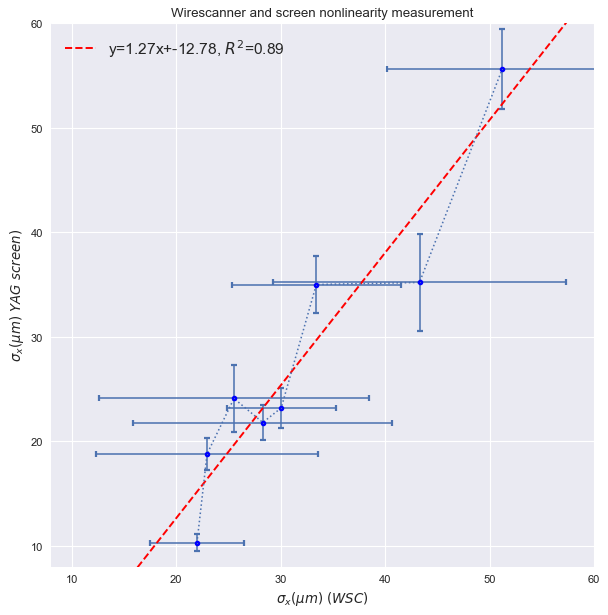

In [37]:
plotdata(yag, wsc)

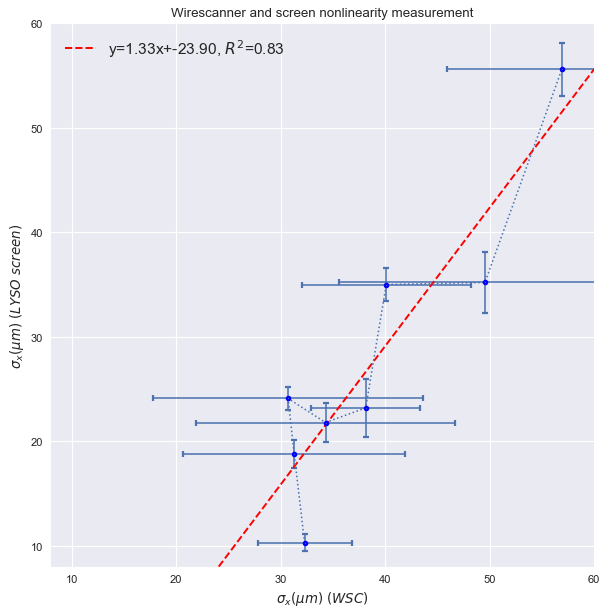

In [38]:
plotdata(lyso, wsc)

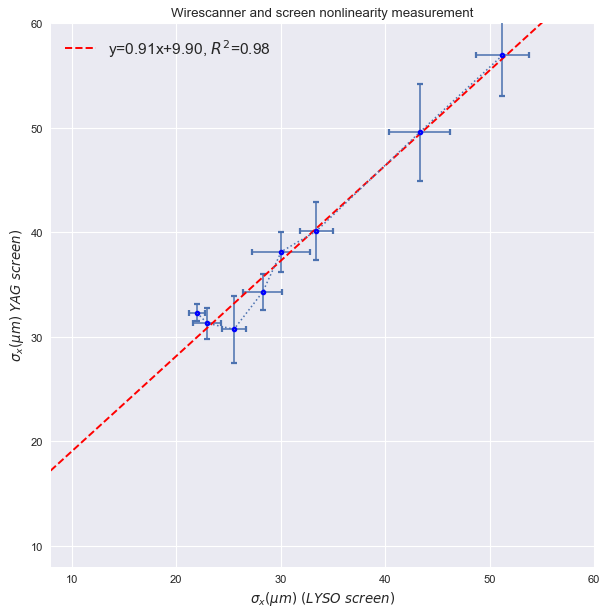

In [39]:
plotdata(yag, lyso)

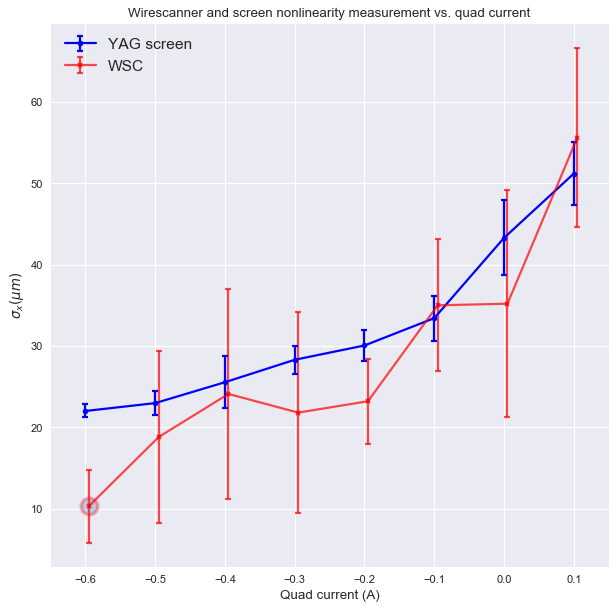

In [40]:
## plot for SPM presentation

_btm = -0.65 
_top = 0.15

plt.figure(figsize=(9, 9), dpi= 80)
plt.errorbar(yag.quad, yag.x, yag.xerr,
                    fmt='-o', color='blue', mec='blue', ms=3, mew=2, capthick=2, linewidth=2, capsize=3,
                     marker='o', markeredgecolor='blue', label='YAG screen')
plt.errorbar(wsc.quad+0.005, wsc.x, wsc.xerr,
                    fmt='-x', color='red', mec='red', ms=3, mew=2, capthick=2, linewidth=2, capsize=3,
                     marker='x', markeredgecolor='red', label='WSC', alpha=0.7)

plt.plot(wsc.quad[0]+0.005, wsc.x[0], marker='o', mec='red', ms=15, mew=3, alpha = 0.3)
#plt.axes().set_aspect('equal')

plt.ylabel('$\sigma_x  (\mu m)$')
plt.xlabel('Quad current (A)')
plt.title("Wirescanner and screen nonlinearity measurement vs. quad current")
plt.grid(True)

plt.xlim(_btm, _top)
#plt.ylim(5, 70)

#regression part
#slope, intercept, r_value, p_value, std_err = stats.linregress(data1.x, data2.x)

#line = slope*x+intercept
#plt.plot(x, line, '--r', label=r'y={:.2f}x+{:.2f}, $R^2$={:.2f}'.format(slope, intercept, r_value**2))
    
plt.legend(fontsize=14)
#end

plt.show()

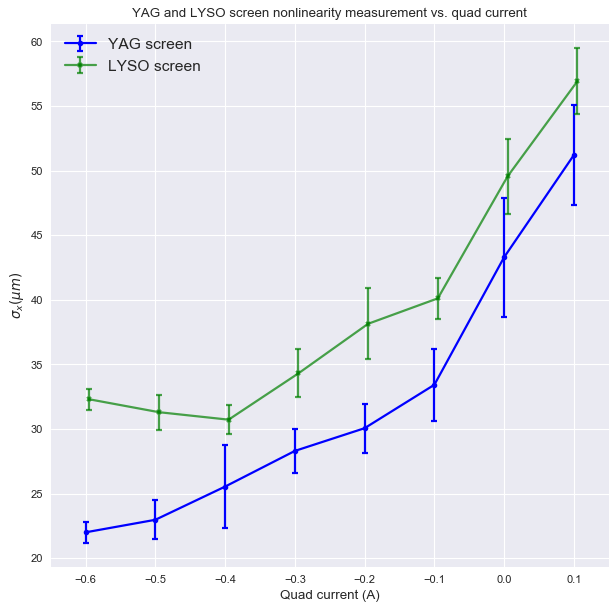

In [41]:
## plot for SPM presentation

_btm = -0.65 
_top = 0.15

plt.figure(figsize=(9, 9), dpi= 80)
plt.errorbar(yag.quad, yag.x, yag.xerr,
                    fmt='-o', color='blue', mec='blue', ms=3, mew=2, capthick=2, linewidth=2, capsize=3,
                     marker='o', markeredgecolor='blue', label='YAG screen')
plt.errorbar(lyso.quad+0.005, lyso.x, lyso.xerr,
                    fmt='-x', color='green', mec='green', ms=3, mew=2, capthick=2, linewidth=2, capsize=3,
                     marker='x', markeredgecolor='green', label='LYSO screen', alpha=0.7)
#plt.axes().set_aspect('equal')

plt.ylabel('$\sigma_x  (\mu m)$')
plt.xlabel('Quad current (A)')
plt.title("YAG and LYSO screen nonlinearity measurement vs. quad current")
plt.grid(True)

plt.xlim(_btm, _top)
#plt.ylim(5, 70)

#regression part
#slope, intercept, r_value, p_value, std_err = stats.linregress(data1.x, data2.x)

#line = slope*x+intercept
#plt.plot(x, line, '--r', label=r'y={:.2f}x+{:.2f}, $R^2$={:.2f}'.format(slope, intercept, r_value**2))
    
plt.legend(fontsize=14)
#end

plt.show()

In [42]:
### ###
### Read dataset for single WSC
### ###

data_folder = Path("U:\\Data\\Shifts\\270918 SF WSC vs Screen nonlinearity\\raw\\")

file_to_open = data_folder / '20180927_145027_console.h5'

f = h5py.File(file_to_open, 'r')


In [43]:
# make a dataset for WSC data
# make a class for data

class wscdata:
    def __init__(self, _run, _hfile):
        self.run = _run # define the number of the run cycle
        
        # read in wposition and BLM value
        self.wposstr = 'x_000' + str(self.run) + '/data/m_pos/value'
        self.wpos = _hfile[self.wposstr]
        self.valstr = 'x_000' + str(self.run) + '/data/blm1/value'
        self.val = _hfile[self.valstr]
        #print(self.val[0])
        
        # read in BPM positions for orbit correction
        self.bpmstr = 'x_000' + str(self.run) + '/data/bpm1_x/value'
        self.bpm1_x = _hfile[self.bpmstr]
        self.bpmstr = 'x_000' + str(self.run) + '/data/bpm1_y/value'
        self.bpm1_y = _hfile[self.bpmstr]
        self.bpmstr = 'x_000' + str(self.run) + '/data/bpm2_x/value'
        self.bpm2_x = _hfile[self.bpmstr]
        self.bpmstr = 'x_000' + str(self.run) + '/data/bpm2_y/value'
        self.bpm2_y = _hfile[self.bpmstr]
        
        self.cwpos = 0 # corrected wire position
        
        self.com = 0
        self.sd = 0
        self.rval = 0

                        
# make a cluster for all data

class cluster:
    def __init__(self, _hfile):
 
        self.filename = _hfile
        self.scanval = '' # set the value of a scanned parameter 
        self.note = '' # give some notes if necessary
        
        self.cycles = [ ]
        for run in range(1,5):
            print('\t ... cycle #{}'.format(run))
            self.cycles.append(wscdata(run, _hfile))
        
        

In [24]:
### ###
### Populate dataset from WSC raw folder
### ###

# os read library
from os import listdir
from os.path import isfile, join

# stats library
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

import pandas as pd

# list out stored files
data_folder = Path("U:\\Data\\Shifts\\270918 SF WSC vs Screen nonlinearity\\raw\\") # specify folder
onlyfiles = [f for f in listdir(data_folder) if isfile(join(data_folder, f))] # read up only the files

# Print out number of found files
print('Found files: {}'.format( len(onlyfiles)) )

# Open files listed in folder
files_to_open = [ ]
for file in range(len(onlyfiles)):
    files_to_open.append(data_folder / onlyfiles[file])

#file_to_open = data_folder / onlyfiles[0]
#f = h5py.File(file_to_open, 'r') # open h5-s

#files_to_open[6]

cluster(hfile)

Found files: 7
	 ... cycle #1
	 ... cycle #2
	 ... cycle #3
	 ... cycle #4


In [25]:
# instantiate and populate
 
Clust = [ ]
for file in range(0,len(onlyfiles)):
    
    file_to_open = files_to_open[file]
    hfile = h5py.File(file_to_open, 'r') # open h5-s
    #with h5py.File(file_to_open, 'r') as hfile:
    print('Read in file #{} {} ...'.format(file, onlyfiles[file]))
    Clust.append(cluster(hfile)) 


# add scan value manually for now
'''
 Iterate over the list using for loop
'''
quads = np.array([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1]) 
for i in (range(7)):
    Clust[i].scanval = quads[i]
    
#for i in range(7):
#    print(Clust[i].scanval)
#Clust[0].filename

Read in file #0 20180927_145027_console.h5 ...
	 ... cycle #1
	 ... cycle #2
	 ... cycle #3
	 ... cycle #4
Read in file #1 20180927_142540_console.h5 ...
	 ... cycle #1
	 ... cycle #2
	 ... cycle #3
	 ... cycle #4
Read in file #2 20180927_142847_console.h5 ...
	 ... cycle #1
	 ... cycle #2
	 ... cycle #3
	 ... cycle #4
Read in file #3 20180927_143205_console.h5 ...
	 ... cycle #1
	 ... cycle #2
	 ... cycle #3
	 ... cycle #4
Read in file #4 20180927_143902_console.h5 ...
	 ... cycle #1
	 ... cycle #2
	 ... cycle #3
	 ... cycle #4
Read in file #5 20180927_144141_console.h5 ...
	 ... cycle #1
	 ... cycle #2
	 ... cycle #3
	 ... cycle #4
Read in file #6 20180927_144422_console.h5 ...
	 ... cycle #1
	 ... cycle #2
	 ... cycle #3
	 ... cycle #4


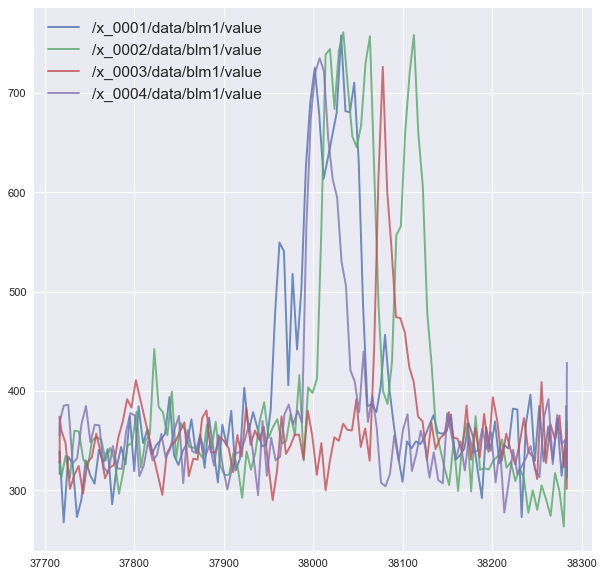

In [26]:
### ###
### Plot graph for every cycle on a single scan
### ###
one_to_plot = 1

plt.figure(figsize=(9, 9), dpi= 80)
for run in range(0,4):
    x = Clust[one_to_plot].cycles[run].wpos
    y = Clust[one_to_plot].cycles[run].val
    plt.plot(x,y, alpha=0.8)

plt.legend(fontsize=14)    
plt.show()

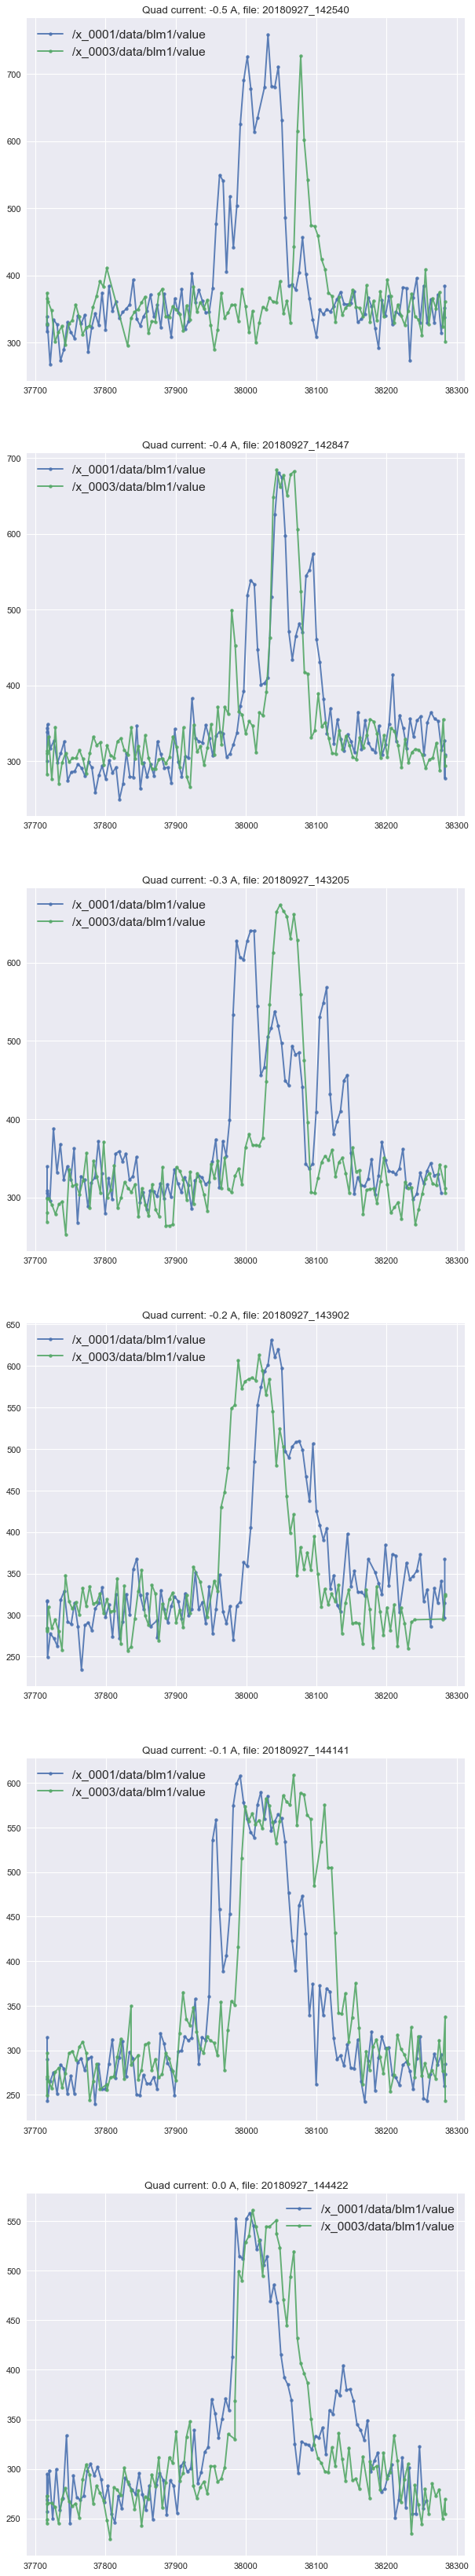

In [29]:
### ###
### Plot all scans
### ###

plt.figure(figsize=(9, 9*9), dpi= 80)

for pls in range(1, 7):
    plt.subplot(9, 1, pls)
    #plt.subplot(2, 1, pls)
    #plt.xlim(-300, 300)
    #plt.ylim(200, 700)
    
    for run in range(0,4,2):
        x = Clust[pls].cycles[run].wpos
        y = Clust[pls].cycles[run].val
        plt.plot(x,y, '-o', ms=4, alpha=0.9) #label=r'y={:.2f}x+{:.2f}
        plt.title('Quad current: {} A, file: {}'.format(Clust[pls].scanval, str(Clust[pls].filename)[12:27])) 
        plt.legend(fontsize=14) 
    
plt.show()    

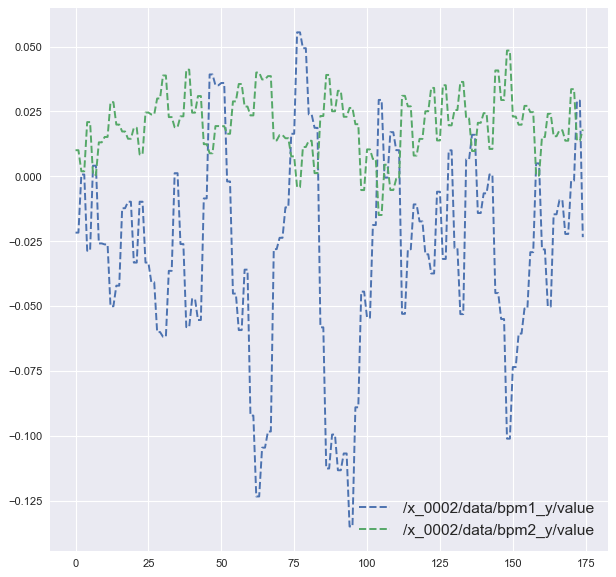

In [30]:
## Plot

plt.figure(figsize=(9, 9), dpi= 80)
for run in range(1,2):
    x1 = Clust[0].cycles[run].bpm1_x
    x2 = Clust[0].cycles[run].bpm2_x
    #plt.plot(x1)
    #plt.plot(x2)
    
    y1 = Clust[0].cycles[run].bpm1_y
    y2 = Clust[0].cycles[run].bpm2_y
    plt.plot(y1, '--')
    plt.plot(y2, '--')    

plt.legend(fontsize=14)    
plt.show()

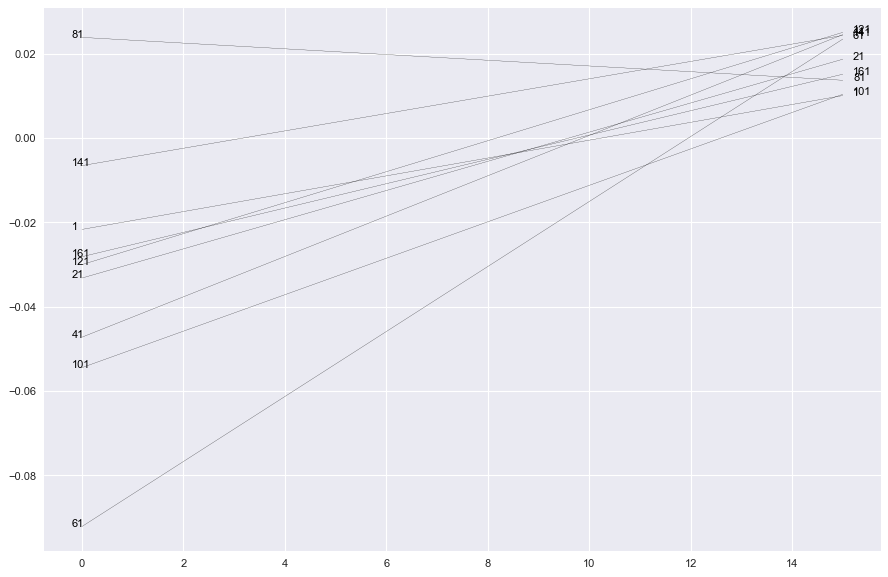

In [31]:
### ###
### Plot linear trajectory from BPM1 to BPM2
### No transfer matrix, quadrupole or anything calculated
### Only pure BPM values
### ###

def connectpoints(bpm1, bpm2, _i, clr='k'):
    x1, x2 = 0, 15
    y1, y2 = bpm1[i], bpm2[i]
    #plt.plot([x1,x2],[y1,y2], color=[0.2, 0.8, 0.1+_i*0.005])   # RGB colorspec
    plt.plot([x1,x2],[y1,y2], clr, linewidth=0.2)   # RGB colorspec
    plt.text(-0.2, bpm1[i], i+1, color=clr, fontsize=10)
    plt.text(15.2, bpm2[i], i+1, color=clr, fontsize=10)

    
pairsy = [ ]
pairsx = [ ]

lg = len(Clust[0].cycles[run].bpm1_y) # length of the list
only = 20 # plot only every Xth point

for r in range(lg):
    frst = Clust[0].cycles[run].bpm1_y[r]
    scnd = Clust[0].cycles[run].bpm2_y[r]
    pairsy.append(frst)
    pairsy.append(scnd)
    
    frst = Clust[0].cycles[run].bpm1_x[r]
    scnd = Clust[0].cycles[run].bpm2_x[r]
    pairsx.append(frst)
    pairsx.append(scnd)

    
## Plot
plt.figure(figsize=(13.5, 9), dpi= 80)
for i in np.arange(0, lg, only):
    connectpoints(Clust[0].cycles[run].bpm1_y, Clust[0].cycles[run].bpm2_y, i)
    #connectpoints(Clust[0].cycles[run].bpm1_x, Clust[0].cycles[run].bpm2_x, i, clr='b')
    
#plt.legend(fontsize=14)    
plt.show()

In [114]:
a = np.zeros(5)

for i in range(1,5):
    mean,std=norm.fit(wscdata(i).val)
    a[i] = std
    print(std)

print('=====')    
print(a.mean())
print(a.std())

TypeError: __init__() missing 1 required positional argument: '_hfile'